This code is for EN5423 class at GIST, Republic of Korea, and created by Dr. Hyunglok Kim.  
**Contact information**: hyunglokkim@gist.ac.kr  
**License**: This work is licensed for non-commercial use only.  
**Restrictions**: Do not use this material without permission for teaching or developing other classes.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyreadr

from scipy.stats import fligner
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.oneway import anova_oneway

# Path to the RDA file
file_path = './specapic.rda'
# Reading the RDA file
result = pyreadr.read_r(file_path)
data = result['specapic']

In [17]:
data

,spcap,rock
0,132.993439,Dolomite
1,8.679813,Dolomite
2,1.550070,Dolomite
3,0.600015,Dolomite
4,4.659928,Dolomite
...,...,...
195,0.299992,Siliciclastic
196,0.029999,Siliciclastic
197,0.919983,Siliciclastic
198,0.249999,Siliciclastic


In [19]:
# Example 1: Specific capacity—Classic ANOVA 
# Fit the model
model = ols('spcap ~ rock', data=data).fit()

# Perform ANOVA
anova_results = sm.stats.anova_lm(model, typ=1)  # typ=1 for Type I SS which R uses by default

# Print the ANOVA table
print(anova_results)

             df         sum_sq      mean_sq        F    PR(>F)
rock        3.0    6475.532023  2158.510674  2.51153  0.059859
Residual  196.0  168450.315468   859.440385      NaN       NaN


In [25]:
# Example 2: Specific capacity—Welch’s adjusted ANOVA.
# Fligner-Killeen test of homogeneity of variances
grouped_data = [data[data['rock'] == rock]['spcap'] for rock in data['rock'].unique()]
stat, p = fligner(*grouped_data)

print("Fligner-Killeen test:")
print("Chi-squared:", stat, ", p-value:", p)

# One-way ANOVA not assuming equal variances
anova_results = anova_oneway(data['spcap'], groups=data['rock'], use_var='unequal')

print("\nOne-way ANOVA (not assuming equal variances):")
print(anova_results)

Fligner-Killeen test:
Chi-squared: 39.45805263692878 , p-value: 1.3880856753298259e-08

One-way ANOVA (not assuming equal variances):
statistic = 3.439684687787948
pvalue = 0.02052032650226662
df = (3.0, 82.54121109385693)
df_num = 3.0
df_denom = 82.54121109385693
nobs_t = 200.0
n_groups = 4
means = [15.49219977  9.83265055  3.15103934  1.07100378]
nobs = [50. 50. 50. 50.]
vars_ = [1546.74565809 1759.18092118  129.99549886    1.83946202]
use_var = unequal
welch_correction = True
tuple = (3.439684687787948, 0.02052032650226662)


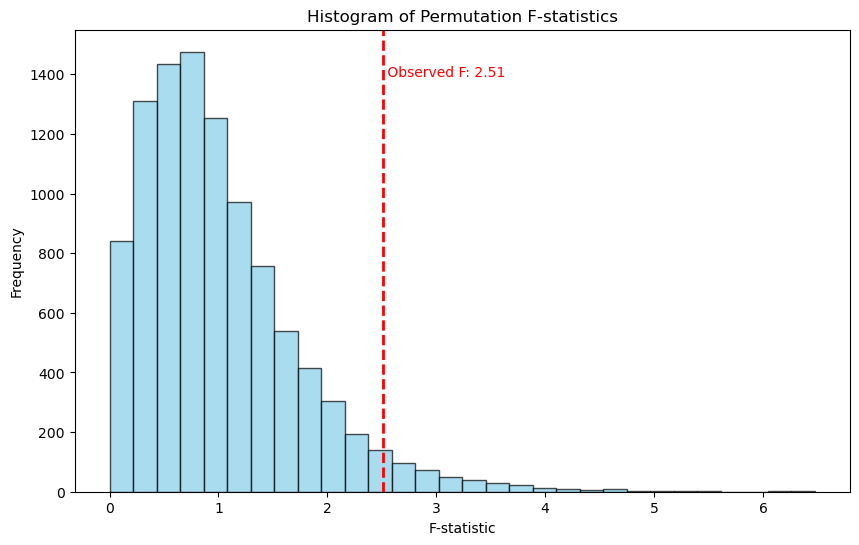

Observed F-statistic: 2.511530423479519
Permutation p-value: 0.0409 (based on 10000 permutations)


In [31]:
# Fit ANOVA model to get the F-statistic for the original data
model = ols('spcap ~ rock', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
f_observed = aov_table['F'].iloc[0]  # Using .iloc for proper indexing

# Permutation test setup
n_permutations = 10000
f_permutations = []

for _ in range(n_permutations):
    # Shuffle the 'rock' labels
    shuffled_rock = np.random.permutation(data['rock'])
    data['shuffled_rock'] = shuffled_rock
    
    # Fit model with shuffled labels
    model_shuffled = ols('spcap ~ shuffled_rock', data=data).fit()
    aov_table_shuffled = sm.stats.anova_lm(model_shuffled, typ=2)
    f_permutations.append(aov_table_shuffled['F'].iloc[0])  # Corrected to use .iloc

# Calculate p-value
p_value = np.mean([f >= f_observed for f in f_permutations])

# Plotting the histogram of the permutation F-statistics
plt.figure(figsize=(10, 6))
plt.hist(f_permutations, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(f_observed, color='r', linestyle='dashed', linewidth=2)
plt.title('Histogram of Permutation F-statistics')
plt.xlabel('F-statistic')
plt.ylabel('Frequency')
plt.text(f_observed, plt.ylim()[1]*0.9, f' Observed F: {f_observed:.2f}', color='red')
plt.show()

print(f"Observed F-statistic: {f_observed}")
print(f"Permutation p-value: {p_value} (based on {n_permutations} permutations)")

In [35]:
# Example 4: Iron at low flows—Two-factor ANOVA
# Path to the RDA file
file_path = './iron.rda'
# Reading the RDA file
result = pyreadr.read_r(file_path)
data_iron = result['iron']

,Fe,Mining,Rocktype,Group
0,0.200000,Unmined,Limestone,lime_un
1,0.250000,Unmined,Limestone,lime_un
2,0.040000,Unmined,Limestone,lime_un
3,0.060000,Unmined,Limestone,lime_un
4,1.200000,Unmined,Limestone,lime_un
...,...,...,...,...
73,11.999998,Reclaimed,Sandstone,sand_re
74,0.600000,Reclaimed,Sandstone,sand_re
75,13.999998,Reclaimed,Sandstone,sand_re
76,0.810000,Reclaimed,Sandstone,sand_re


Shapiro-Wilk normality test
W = 0.3350742649225724, p-value = 4.6104433466381143e-17

ANOVA table:
                              sum_sq    df         F    PR(>F)
C(Mining)               32282.304955   2.0  2.492636  0.089804
C(Rocktype)             15411.161730   1.0  2.379906  0.127289
C(Mining):C(Rocktype)   25868.829021   2.0  1.997428  0.143133
Residual               466238.520226  72.0       NaN       NaN


<Figure size 600x600 with 0 Axes>

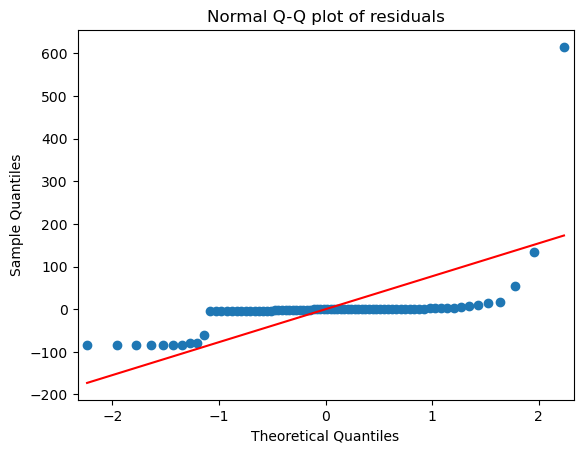

Fligner-Killeen test of homogeneity of variances
Chi-squared = 23.79247744356734, df = 5, p-value = 0.00023798153092770443


In [38]:
# Fit ANOVA model
model = ols('Fe ~ C(Mining) * C(Rocktype)', data=data_iron).fit()

# Shapiro-Wilk test on residuals
shapiro_test = stats.shapiro(model.resid)
print("Shapiro-Wilk normality test")
print(f"W = {shapiro_test.statistic}, p-value = {shapiro_test.pvalue}")

# Summary of the ANOVA model
anova_table = sm.stats.anova_lm(model, typ=2)  # Type II ANOVA DataFrame
print("\nANOVA table:")
print(anova_table)

# Q-Q plot of residuals
plt.figure(figsize=(6, 6))
sm.qqplot(model.resid, line='s')
plt.title('Normal Q-Q plot of residuals')
plt.show()

# Fligner-Killeen test of homogeneity of variances
fligner_test = stats.fligner(*[group['Fe'].values for name, group in data_iron.groupby('Group', observed=True)])
print("Fligner-Killeen test of homogeneity of variances")
print(f"Chi-squared = {fligner_test.statistic}, df = {len(data_iron['Group'].unique()) - 1}, p-value = {fligner_test.pvalue}")

In [40]:
# Example 5: Iron at low flows—Two-actor ANOVA using logarithms
# Fit ANOVA model
model = ols('np.log(Fe) ~ C(Mining) * C(Rocktype)', data=data_iron).fit()

# Summary of the ANOVA model
anova_table = sm.stats.anova_lm(model, typ=2)  # Type II ANOVA DataFrame
print("\nANOVA table:")
print(anova_table)


ANOVA table:
                           sum_sq    df          F    PR(>F)
C(Mining)               69.746910   2.0  15.890508  0.000002
C(Rocktype)             26.312445   1.0  11.989581  0.000904
C(Mining):C(Rocktype)    2.441812   2.0   0.556320  0.575759
Residual               158.011862  72.0        NaN       NaN
